In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [8]:
df_original = pd.read_csv('kc_house_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'kc_house_data.csv'

In [ ]:
df_original.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>]], dtype=object)

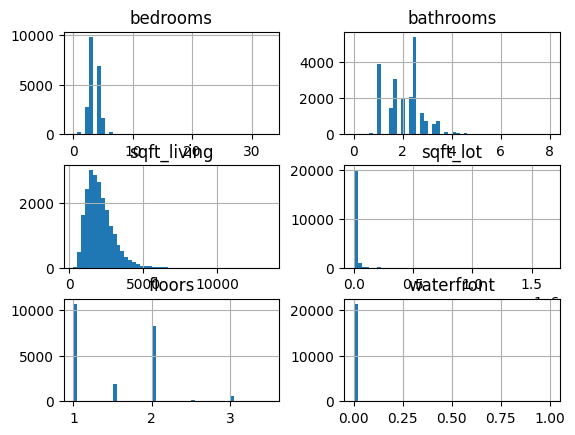

In [ ]:
features_names = [
    'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront']

#df_original['sqft_lot'].hist(bins=50)
df_original[features_names].hist(bins=50)

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living_log'}>,
        <Axes: title={'center': 'sqft_lot_log'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>]], dtype=object)

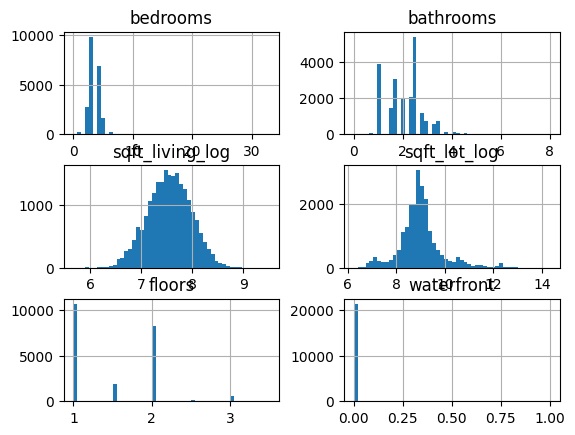

In [ ]:
df_original['sqft_living_log'] = np.log(df_original['sqft_living'])
df_original['sqft_lot_log'] = np.log(df_original['sqft_lot'])

features_names = [
    'bedrooms', 'bathrooms', 'sqft_living_log',
    'sqft_lot_log', 'floors', 'waterfront']

df_original[features_names].hist(bins=50)

In [ ]:
# Faking missing values
idx = np.random.randint(0,21000, 2000)
df_original.loc[idx,'bedrooms'] = np.nan

In [ ]:
bedroom_imputer = SimpleImputer(strategy='median')
bedroom_imputer.fit(df_original[['bedrooms']])
df_original[['bedrooms_no_nan']] = bedroom_imputer.transform(df_original[['bedrooms']])


In [ ]:
features_names = [
    'bedrooms_no_nan', 'bathrooms', 'sqft_living_log',
    'sqft_lot_log', 'floors', 'waterfront']

features_min_max_sc = ['bathrooms', 'floors'] 

b_f_minmax_sc = MinMaxScaler()
b_f_minmax_sc.fit(df_original[features_min_max_sc])
df_original[['bathrooms_mm', 'floors_mm']] = b_f_minmax_sc.transform(df_original[features_min_max_sc])

In [ ]:
features_std_sc = ['bedrooms_no_nan', 'sqft_living_log', 'sqft_lot_log']
b_sl_sl_std_sc = StandardScaler()
b_sl_sl_std_sc.fit(df_original[features_std_sc])
df_original[['bedrooms_no_nan_std_sc', 'sqft_living_log_std_sc', 'sqft_lot_log_std_sc']] = b_sl_sl_std_sc.transform(df_original[features_std_sc])


array([[<Axes: title={'center': 'bedrooms_no_nan_std_sc'}>,
        <Axes: title={'center': 'bathrooms_mm'}>],
       [<Axes: title={'center': 'sqft_living_log_std_sc'}>,
        <Axes: title={'center': 'sqft_lot_log_std_sc'}>],
       [<Axes: title={'center': 'floors_mm'}>,
        <Axes: title={'center': 'waterfront'}>]], dtype=object)

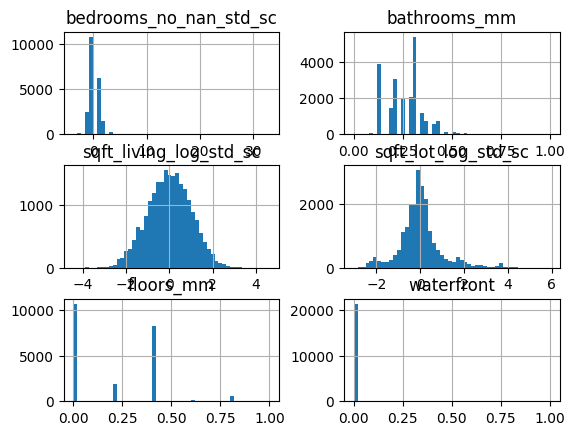

In [ ]:
features_names = [
    'bedrooms_no_nan_std_sc', 'bathrooms_mm', 'sqft_living_log_std_sc',
    'sqft_lot_log_std_sc', 'floors_mm', 'waterfront']
df_original[features_names].hist(bins=50)

In [4]:
# low_grade_rows = df_original['grade']<7
# df_original.loc[low_grade_rows,'grade_text'] = 'low'

# mid_grade_rows = (df_original['grade']>=7) & ((df_original['grade']<=8))
# df_original.loc[mid_grade_rows,'grade_text'] = 'mid'

# high_grade_rows = df_original['grade']>8
# df_original.loc[high_grade_rows,'grade_text'] = 'high'

def grade_num_to_text(grade):
    if grade<7:
        return 'low'
    elif grade>8:
        return 'high'
    else:
        return 'mid'

df_original['grade_text'] = df_original['grade'].map(grade_num_to_text)

# def grade_num_to_text(row):
#     if row<7:
#         return 'low'
#     elif row>8:
#         return 'high'
#     else:
#         return 'mid'

# a = df_original['grade'].apply(grade_num_to_text)

NameError: name 'df_original' is not defined

In [3]:
oe_columns = ['grade_text']
oe_grades = OrdinalEncoder()
oe_grades.fit(df_original[oe_columns])
df_original[['grade_text_oe']] = oe_grades.transform(df_original[oe_columns])

NameError: name 'df_original' is not defined

In [10]:
ohe_grades = OneHotEncoder(sparse_output=False)
ohe_grades.fit(df_original[oe_columns])
ohe_column_name = ['grade_high', 'grade_low', 'grade_mid']
# ohe_column_name = ohe_grades.get_feature_names_out()
df_original[ohe_column_name] = ohe_grades.transform(df_original[oe_columns])

NameError: name 'df_original' is not defined

In [ ]:
df_original['grade_text']

0        mid
1        mid
2        low
3        mid
4        mid
        ... 
21608    mid
21609    mid
21610    mid
21611    mid
21612    mid
Name: grade_text, Length: 21613, dtype: object

In [ ]:
features_names = [
    'bedrooms_no_nan_std_sc', 'bathrooms_mm', 'sqft_living_log_std_sc',
    'sqft_lot_log_std_sc', 'floors_mm', 'waterfront', 'grade_high', 'grade_low', 'grade_mid']

X = np.c_[df_original[features_names]]
y = np.c_[df_original['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

In [62]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'MAE train: {mae_train}')
print(f'MSE train: {mse_train}')
print(f'R2 train: {r2_train}')

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'MAE test: {mae_test}')
print(f'MSE test: {mse_test}')
print(f'R2 test: {r2_test}')
df_train = 10

MAE train: 181463.93331544052
MSE train: 75724763598.7651
R2 train: 0.44076292625721014
MAE test: 182176.87440096794
MSE test: 76721860260.1933
R2 test: 0.4198509698626399
